<a href="https://colab.research.google.com/github/pavi-ninjaac/SARS_CoV_2_DNA_Analysis/blob/main/ChoasGameRepresentaton(fcgr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choas Game Representation image

In [1]:
! pip install Bio

     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 2.3MB 10.6MB/s 


In [35]:
from Bio import SeqIO
from collections import defaultdict
import math

#vsualization
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab

In [5]:
filepath = '/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/HIV.fasta'
records = list(SeqIO.parse(filepath , 'fasta' ))
records[0]

SeqRecord(seq=Seq('CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAGGGGGCCAG...ATA'), id='MW016009.1', name='MW016009.1', description='MW016009.1 |HIV-1 isolate NARI_18-5450_010721 from India pol protein (pol) and gag protein (gag) genes, partial cds', dbxrefs=[])

In [7]:
#lets take one DNA sequence of HIV to draw the CGR 
data = str(records[1].seq)
len(data)

1029

In [8]:
# now the data is a single string contaning the whole dna sequence with the length of 1029
data

'CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAGGGGGCCAGATAAAAGAGGCTCTCTTAGATACAGGAGCAGATGACACAGTATTAGAAGACATAAATTTGCCAGGAAAATGGAAACCAAAAATGATAGGAGGAATTGGAGGTTTTATCAAAGTAAGACAATATGATCAAATACCTTTAGAAATTTGTGGAAAAAAGGCTATAGGTACAGTGTTAGTAGGACCCACACCTGTCAACATAATTGGAAGAAATCTGTTGACTCAGCTTGGATGCACACTAAATTTTCCAATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAATGGATGGCCCAAAGGTTAAACAATGGCCATTGACAGAAGAGAAAATAAAAGCATTAACAGAAATTTGTRATGAAATGGAGAAGGAAGGAAAAATTACAAAAATTGGGCCTGAAAATCCATATAATACTCCAATATTTGCCATAAAAAAGAAGGACAGTACTAAGTGGAGAAAATTAGTAGATTTCAGAGAACTCAATAAAAGAACTCAAGATTTTTGGGAAGTCCAATTAGGAATACCACACCCAGCAGGGTTAAAAAAGAAAAAATCAGTGACAGTACTGGATGTGGGGGATGCATATTTTTCAGTTCCTTTATATGAAGATTTCAGGAAATATACAGCATTCACCATACCTAGTATAAACAATGAAACACCAGGGATTAGATATCAATATAATGTGCTACCACAGGGATGGAAAGGATCACCAGCAATATTTCAGTGTAGCATGACAAAAATCTTAGAGCCCTTTAGGACACAAAATCCAGAACTAGTCATCTATCAATATATGGATGACTTGTATGTAGGATCTGACTTAGAAATAGGGCAACATAGAGCAAAGATAGAAGAATTAAGACAACATCTGTTAAAGTGGGGATTTACCACACCAGATAAGAAGCATCAGAAAGAACCCCCTTTCCTTTGGATGGGGTATGAACTC

In [19]:
k = 4
len_data = len(data)

In [11]:
#count the occurance of the kmers
def kmer_count(data , k ):
  d = defaultdict(int)

  for i in range(len(data) - (k-1)):
    d[data[i : i+k ]] += 1
  for key in d.keys():
    if 'N' in key:
      del d[key]
  return d
kemr_count_dict = kmer_count(data , k)

In [18]:
# find the each kmer propability
def propability_kmer(kmer_count_dict , k , len_data):
  N = len_data
  total_len_kemrs = N-k+1
  prop = defaultdict(float)
  for key,value in kmer_count_dict.items():
    prop[key] = float(value) / total_len_kemrs #n(A)/P(s)
  return prop


propability_kmer_dict = propability_kmer(kemr_count_dict , k , len_data)  
print(propability_kmer_dict )

defaultdict(<class 'float'>, {'CCTC': 0.0009746588693957114, 'CTCA': 0.004873294346978557, 'TCAA': 0.008771929824561403, 'CAAA': 0.008771929824561403, 'AAAT': 0.021442495126705652, 'AATC': 0.005847953216374269, 'ATCA': 0.007797270955165692, 'TCAC': 0.0029239766081871343, 'CACT': 0.001949317738791423, 'ACTC': 0.005847953216374269, 'CTCT': 0.0029239766081871343, 'TCTT': 0.0029239766081871343, 'CTTT': 0.005847953216374269, 'TTTG': 0.00682261208576998, 'TTGG': 0.00682261208576998, 'TGGC': 0.0029239766081871343, 'GGCA': 0.001949317738791423, 'GCAG': 0.0029239766081871343, 'CAGC': 0.005847953216374269, 'AGCG': 0.0009746588693957114, 'GCGA': 0.0009746588693957114, 'CGAC': 0.0009746588693957114, 'GACC': 0.001949317738791423, 'ACCC': 0.003898635477582846, 'CCCC': 0.0029239766081871343, 'CCCT': 0.0029239766081871343, 'CCTG': 0.003898635477582846, 'CTGG': 0.001949317738791423, 'TGGT': 0.0009746588693957114, 'GGTC': 0.0009746588693957114, 'GTCT': 0.0009746588693957114, 'TCTC': 0.001949317738791423

In [34]:
# choas game representaton
def Choas_Game_Representation(propability_kmer_dict , k):
  array_size = int(math.sqrt(4**k))
  print(array_size)
  choas = []
  #intializing the array
  for i in range(array_size):
    choas.append([0] * array_size)
  print(choas)
  #initializing the axis
  maxX = array_size
  maxY = array_size
  posX = 1
  posY = 1

  for key,value in propability_kmer_dict.items():
    #print(key)
    for char in key:
      if char == "T":
                posX += maxX / 2
      elif char == "C":
                posY += maxY / 2
      elif char == "G":
                posX += maxX / 2
                posY += maxY / 2
      maxX /= 2
      maxY /= 2
    posX,posY = int(posX) ,int(posY)
    choas[posY-1][posX-1] = value
      #reinitializing to the starting value
    maxX = array_size
    maxY = array_size
    posX = 1
    posY = 1

  return choas
choas_rep_matrix = Choas_Game_Representation(propability_kmer_dict , k)
print(choas_rep_matrix)

16
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0.029239766081871343, 0.021442495126705652, 0.012670565302144249, 0.012670565302144249, 0.011695906432748537, 0.010721247563352826, 0.008771929824561403, 0.010721247563352826, 0.0136452241715399

8
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


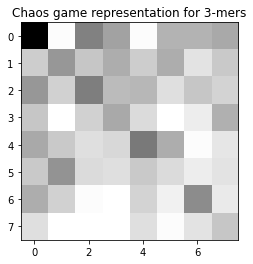

16
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


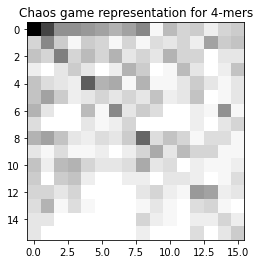

In [37]:
#draw the representation
#differensiate the 3-mer and 4-mer

#fiind the frequency
kmer_count_dict_3 = kmer_count(data , 3)
kmer_count_dict_4 = kmer_count(data , 4)

#find the propability
propability_kmer_dict_3 = propability_kmer(kmer_count_dict_3 , 3 , len_data)
propability_kmer_dict_4 = propability_kmer(kmer_count_dict_4 , 4 , len_data)

#find the matrixand draw

choas_rep_matrix_3 = Choas_Game_Representation(propability_kmer_dict_3 , 3)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(choas_rep_matrix_3, interpolation='nearest', cmap=cm.gray_r)
pylab.show()



choas_rep_matrix_4 = Choas_Game_Representation(propability_kmer_dict_4 , 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(choas_rep_matrix_4, interpolation='nearest', cmap=cm.gray_r)
pylab.show()